In [117]:
db="/content/iris.csv"

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [119]:
from sklearn.metrics import classification_report , accuracy_score

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [121]:
iris_data = pd.read_csv(db)
print(iris_data['species'].unique())

['setosa' 'versicolor' 'virginica']


In [122]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [123]:
iris_data.info()
print(iris_data['species'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
['setosa' 'versicolor' 'virginica']


In [124]:

from collections import Counter
import numpy as np

class KnnMDS:

    def __init__(self, k):
        self.n_neighbours = k
        self.X_train = None
        self.Y_train = None

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        y_pred = []

        for i in X_test:
            distances = []
            for j in self.X_train:
                distances.append(self.calculate_distance(i, j))

            # Get the indices of the k smallest distances
            n_neighbors = sorted(list(enumerate(distances)), key=lambda x: x[1])[:self.n_neighbours]

            # Get the majority vote from the k nearest neighbors
            label = self.majority_count(n_neighbors)
            y_pred.append(label)

        return np.array(y_pred)

    def calculate_distance(self, point_A, point_B):
        # Euclidean distance between two points
        return np.linalg.norm(point_A - point_B)

    def majority_count(self, neighbors):
        # Get the votes from the nearest neighbors
        votes = [self.Y_train[i[0]] for i in neighbors]
        vote_counts = Counter(votes)

        # Return the most common class (majority vote)
        return vote_counts.most_common(1)[0][0]



In [125]:
iris_data['species']=iris_data['species'].map({'setosa':0,
'versicolor':1,'virginica':2})
print(iris_data['species'].unique())

[0 1 2]


In [126]:
x=iris_data[['sepal_length','sepal_width','petal_length','petal_width']].values
y=iris_data['species'].values

In [127]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_data['species'] = encoder.fit_transform(iris_data['species'])

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [129]:
labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [130]:
print(y_test)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [131]:
accuracy_scores=[]

for i in range(1,10):
  knn = KnnMDS(k=i)
  knn.fit(x_train,y_train)
  predictions=knn.predict(x_test)
  print(f"K={i}")
  print(classification_report(y_test,predictions,target_names=labels))
  accuracy_scores.append(accuracy_score(y_test,predictions))

K=1
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

K=2
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

K=3
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virgin

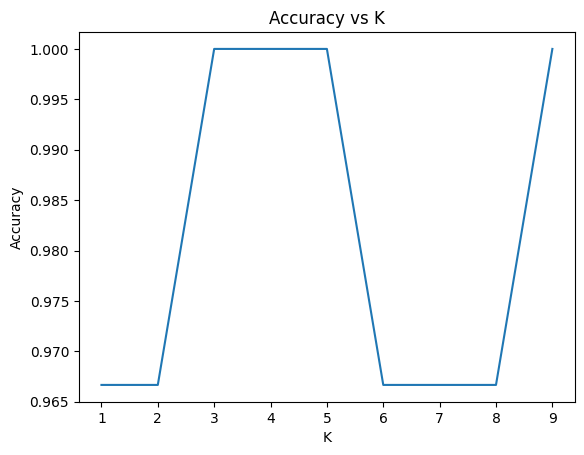

In [132]:
sns.lineplot(x=range(1,len(accuracy_scores)+1),y=accuracy_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()